# Comparison of the performances of classification models

Build kNN and logistic regression classifiers using sklearn library to predict "satisfaction" (**label** variable) by using given data. 
- First, shuffle and split your data into train, validation and test sets randomly, with a ratio of 70:10:20 **(10 points)**. 
- Build your models (with proper comments and explanations) using training set, and do parameter selection over the validation set  **(45 points)**. 
- Compare these 2 classification models according to their accuracies (you can print accuracy values in a single table as a comprehensive view) over the test set. Comment on their classification performance **(10 points)**.
- Plot confusion matrices for your models over the test set, and comment on the outcomes **(15 points)**. 
- Finally, plot Precision-Recall (PR) curves for each classification model over the test set and evaluate the prediction performance of each classifier **(20 points)**. 

Notes:

* Choose the optimal k value using Minkowski distance (with trying two different p-values) for kNN model using the validation set. 


* For any parameter selection, use the validation set.


* Don't forget to add comments into your code lines to explain how your program works, your intentions behind it. Also, do not forget to comment on the outcomes and comparisons. 

                                           -----------Assignment4-----------
### Name : Muhammet Ali                        
### Surname: Şentürk
### ID : 21993073                                     
### Lecture : AIN214
### Due Date : 16/12/2021 14:00
### Grade:100

In [1]:
# Importing libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read and print the shape of the data and first 5 rows of it.
data_df_org = pd.read_csv("data.csv")
data_df = data_df_org.copy()
print("Shape of the data is: {}".format(data_df.shape))
data_df.head()

Shape of the data is: (1735, 23)


,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [3]:
# Detecting the missing(NaN) values.
data_df.isnull().sum()

satisfaction                         0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             5
dtype: int64

In [4]:
# Filling the missing values with the mean.
data_df["Arrival Delay in Minutes"].fillna(data_df["Arrival Delay in Minutes"].mean(), inplace=True)

In [5]:
# To see the types of the columns, we have to check this output.
# We are trying to detect the categorical variable and after the one hot encoding process, their type will become integer.
# Why we are doing this? Because when we build our model, the classifier needs numeric variables.
data_df.dtypes

satisfaction                          object
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival De

In [6]:
# Printing the value counts(how many of which value) of categorical variables
print("-----------------Satisfaction-----------------")
print(data_df["satisfaction"].value_counts())
print("----------------------------------------------")
print("--------------------Gender--------------------")
print(data_df["Gender"].value_counts())
print("----------------------------------------------")
print("-----------------CustomerType-----------------")
print(data_df["Customer Type"].value_counts())
print("----------------------------------------------")
print("-----------------TypeOfTravel-----------------")
print(data_df["Type of Travel"].value_counts())
print("----------------------------------------------")
print("--------------------Class---------------------")
print(data_df["Class"].value_counts())
print("----------------------------------------------")

-----------------Satisfaction-----------------
satisfied       906
dissatisfied    829
Name: satisfaction, dtype: int64
----------------------------------------------
--------------------Gender--------------------
Female    919
Male      816
Name: Gender, dtype: int64
----------------------------------------------
-----------------CustomerType-----------------
Loyal Customer       930
disloyal Customer    805
Name: Customer Type, dtype: int64
----------------------------------------------
-----------------TypeOfTravel-----------------
Business travel    883
Personal Travel    852
Name: Type of Travel, dtype: int64
----------------------------------------------
--------------------Class---------------------
Eco         1118
Business     494
Eco Plus     123
Name: Class, dtype: int64
----------------------------------------------


In [7]:
# There is a function which takes 2 arguments: column name and any column value.
# This function converts the string value to integer. 
# Column value which we take as a parameter will be 1 and the other will be 0.
# But there is a condition that the number of variables must be 2.
def categoricalToInt(column_name, column_val):
    for i in range(len(data_df[column_name])):
        if data_df[column_name][i] == column_val:
            data_df[column_name][i] = 1
        else:
            data_df[column_name][i] = 0

# Redesigning the categorical variables as integer values.
categoricalToInt("satisfaction", "satisfied")
categoricalToInt("Gender", "Male")
categoricalToInt("Customer Type", "Loyal Customer")
categoricalToInt("Type of Travel", "Business travel")

# "Class" variable has 3 types of values. So that we cannot use the function above. We have to use pd.get_dummies.
# This method creates new dataframe so we have to concatenate with the main dataframe.
classLabel = pd.get_dummies(data_df["Class"], prefix="Class")

# Concatenating dataframes and deleting the "Class" variable because we do not need it anymore.
one_hot_data_df = pd.concat([data_df, classLabel], axis=1)
one_hot_data_df.drop(["Class"], axis=1, inplace=True)
one_hot_data_df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Class_Business,Class_Eco,Class_Eco Plus
0,1,0,1,65,0,265,0,0,0,2,...,0,3,5,3,2,0,0.0,0,1,0
1,1,1,1,47,0,2464,0,0,0,3,...,4,4,2,3,2,310,305.0,1,0,0
2,1,0,1,15,0,2138,0,0,0,3,...,3,4,4,4,2,0,0.0,0,1,0
3,1,0,1,60,0,623,0,0,0,3,...,0,1,4,1,3,0,0.0,0,1,0
4,1,0,1,70,0,354,0,0,0,3,...,0,2,4,2,5,0,0.0,0,1,0


In [8]:
# Now we can set all of the variables' type as integer.
one_hot_data_df = one_hot_data_df.astype("int64")

In [9]:
# Splitting the data into independent(X or predictor) and dependent(y or outcome) variables.
X = one_hot_data_df.drop(["satisfaction"], axis=1)
y = one_hot_data_df[["satisfaction"]]

In [10]:
# Importing Train test split.
from sklearn.model_selection import train_test_split

In [11]:
# Train test split process 2 times in a row.
# First split in order to obtain train and test sets as the test size is 0.2
# Second split in order to obtain train and validation sets as the validation(test) size is 1/8
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/8, random_state=1)
print("Shape of X_train is: {}         Shape of y_train is: {}".format(X_train.shape, y_train.shape))
print("Shape of X_test is: {}           Shape of y_test is: {}".format(X_test.shape, y_test.shape))
print("Shape of X_val is:{}             Shape of y_val is: {}".format(X_val.shape, y_val.shape))

Shape of X_train is: (1214, 24)         Shape of y_train is: (1214, 1)
Shape of X_test is: (347, 24)           Shape of y_test is: (347, 1)
Shape of X_val is:(174, 24)             Shape of y_val is: (174, 1)


In [12]:
# Importing libraries and functions for logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score

In [13]:
# At first we are trying to fit out model by using logistic regression without any parameter selection.
# After, to see the accuracy of the model, we print the accuracy score.
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)
accuracy = accuracy_score(y_val, log_reg_model.predict(X_val))
print("Accuracy score of this model is: {}".format(accuracy))

Accuracy score of this model is: 0.9482758620689655


This accuracy score is really good. But we have to look for how much we can increase this score.

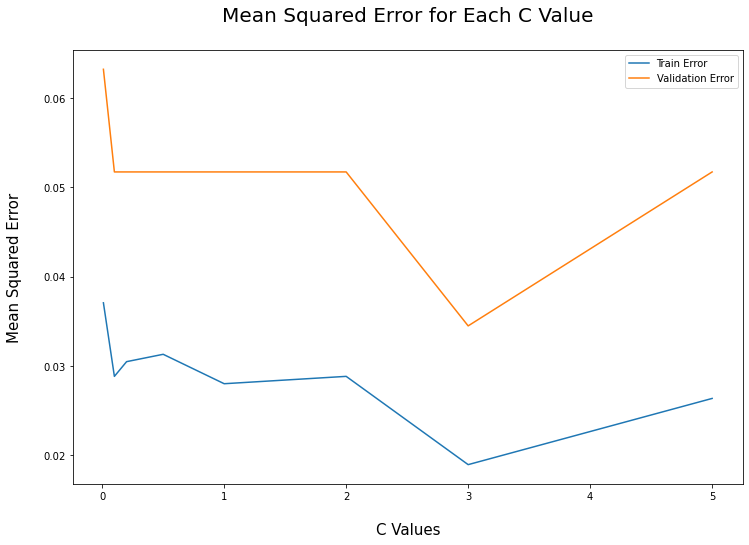

In [14]:
# After that, we defined 2 empty lists and a list that contains random numbers.
# These empty lists will store train and validation errors.
# C_vals list will be used in the for loop below in order to find optimal C for our logistic regression model.
train_errors = []
valid_errors = []
C_vals = [0.01,0.1, 0.2, 0.5, 1, 2, 3, 5]
for c in C_vals:
    best_log_reg_model = LogisticRegression(C=c)
    best_log_reg_model.fit(X_train, y_train)

    train_errors.append(mean_squared_error(y_train, best_log_reg_model.predict(X_train)))
    valid_errors.append(mean_squared_error(y_val, best_log_reg_model.predict(X_val)))

# And plot the results in the same graph
plt.figure(figsize=(12,8))
plt.title("Mean Squared Error for Each C Value\n", fontsize=20)
plt.xlabel("\nC Values", fontsize=15)
plt.ylabel("Mean Squared Error\n", fontsize=15)
plt.plot(C_vals, train_errors, label="Train Error")
plt.plot(C_vals, valid_errors, label="Validation Error")
plt.legend()
plt.show()

As we can see here, the minimum value of error obtained for both train and validation when we choose c = 3. 
So, our c value of logistic regressor is 3.

In [15]:
# With optimal parameter, we build new logistic regression model.
# Printing the accuracy score of it as well.
final_log_reg_model = LogisticRegression(C=3)
final_log_reg_model.fit(X_train, y_train)
accuracy_lr = accuracy_score(y_val, final_log_reg_model.predict(X_val))
print("Accuracy score of this model is: {}".format(accuracy_lr))

Accuracy score of this model is: 0.9655172413793104


 - Before the parameter selection, our accuracy score was **0.9482758620689655**.
 - After the parameter selection, it becomes **0.9655172413793104**.
 - It shows that our parameter selection process was successful. It increased the accuracy of the model.

In [16]:
# Importing kNN classifier
from sklearn.neighbors import KNeighborsClassifier

In [17]:
# At first we are trying to fit out model by using kNN without any parameter selection.
# After, to see the accuracy of the model, we print the accuracy score.
knn_cls = KNeighborsClassifier()
knn_cls.fit(X_train, y_train)
accuracy = accuracy_score(y_val, knn_cls.predict(X_val))
print("Accuracy score of this model is: {}".format(accuracy))

Accuracy score of this model is: 0.6149425287356322


This accuracy score has such a low value actually. We need to increase it as far as we can.

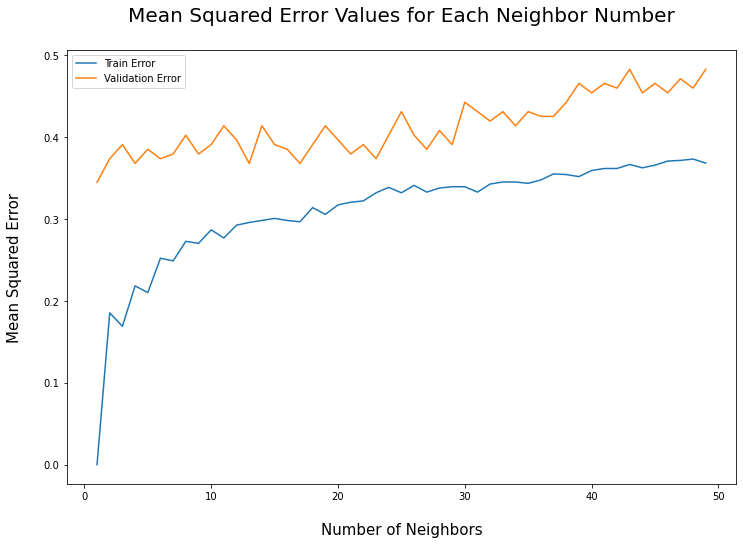

In [18]:
# After that, we defined 2 empty lists and a list that contains numbers from 1 to 50.
# These empty lists will store train and validation errors.
# n_neighbors list will be used in the for loop below in order to find optimal number of neighbors for our kNN classifier model.
train_errors = []
valid_errors = []
n_neighbors = list(range(1,50))

for n in n_neighbors:
    best_knn_cls = KNeighborsClassifier(n_neighbors=n)
    best_knn_cls.fit(X_train, y_train)

    train_errors.append(mean_squared_error(y_train, best_knn_cls.predict(X_train)))
    valid_errors.append(mean_squared_error(y_val, best_knn_cls.predict(X_val)))

# And plot the results in the same graph
plt.figure(figsize=(12,8))
plt.title("Mean Squared Error Values for Each Neighbor Number\n", fontsize=20)
plt.xlabel("\nNumber of Neighbors", fontsize=15)
plt.ylabel("Mean Squared Error\n", fontsize=15)
plt.plot(n_neighbors, train_errors, label="Train Error")
plt.plot(n_neighbors, valid_errors, label="Validation Error")
plt.legend()
plt.show()

In [19]:
# This graph shows that we obtain minimum error for train set when we choose neighbor number as 1.
# But it can be hard to understand what about the validation set. So we can show this like:
print("The minimum value of validation error obtained for which value of neighbor: {}".format(valid_errors.index(min(valid_errors))+1))

The minimum value of validation error obtained for which value of neighbor: 1


As we can see here, the minimum value of error obtained for both train and validation when we choose the number of variables as 1.
So, our model will has 1 neighbor.

In [20]:
# With optimal parameter, we build new kNN classifier model.
# Printing the accuracy score of it as well.
final_knn_cls = KNeighborsClassifier(n_neighbors=1)
final_knn_cls.fit(X_train, y_train)
accuracy_knn = accuracy_score(y_val, final_knn_cls.predict(X_val))
print("Accuracy score of this model is: {}".format(accuracy_knn))

Accuracy score of this model is: 0.6551724137931034


 - Before the parameter selection, our accuracy score was **0.6149425287356322**.
 - After the parameter selection, it becomes **0.6551724137931034**.
 - It is still the low value but at least we increased the value a little bit more. 
 - It shows that our parameter selection process was successful. It increased the accuracy of the model.

In [21]:
print("Accuracy score of logistic regression is: {}".format(accuracy_lr))
print("Accuracy score of kNN classifier is: {}".format(accuracy_knn))

Accuracy score of logistic regression is: 0.9655172413793104
Accuracy score of kNN classifier is: 0.6551724137931034


After 2 models we built and considering their accuracy scores, we can easily say that logistic regression model is more accurate and performs better than kNN classifier. 
 

In [22]:
# Importing the function in order to show confusion matrix as a heatmap
from sklearn.metrics import confusion_matrix
import seaborn as sns

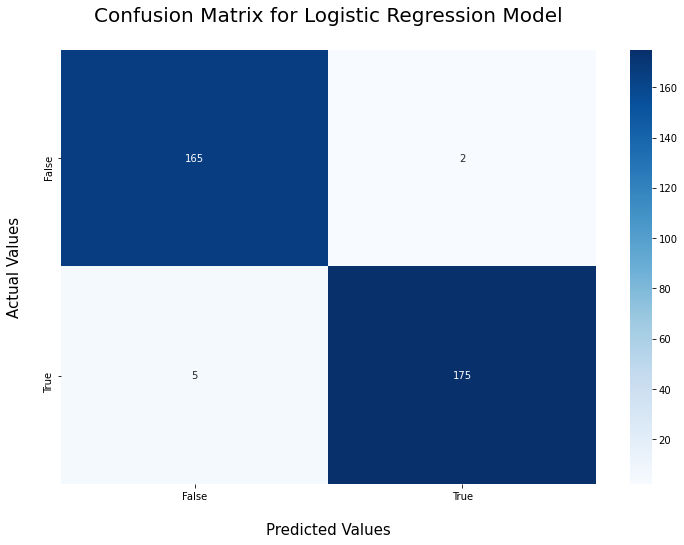

In [23]:
# Plotting the confusion matrix for logistic regression on test set
cf_matrix_lr = confusion_matrix(y_test, final_log_reg_model.predict(X_test))
plt.figure(figsize=(12,8))
ax = sns.heatmap(cf_matrix_lr, annot=True, cmap='Blues', fmt='g')
ax.set_title('Confusion Matrix for Logistic Regression Model\n', fontsize=20)
ax.set_xlabel('\nPredicted Values', fontsize=15)
ax.set_ylabel('Actual Values\n', fontsize=15)
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

 - True-positive and true-negative values are high so the accuracy is really good.
 - False-positive and false-negative values are low so the error rate is low which is nice news as well.
 - By looking at this, we can easily see that the precision and recall values are high.

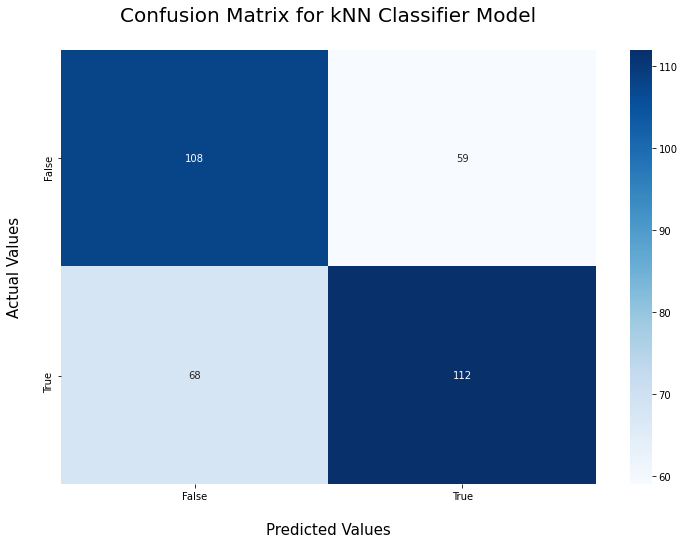

In [24]:
# Plotting the confusion matrix for kNN classifier on test set
cf_matrix_knn = confusion_matrix(y_test, final_knn_cls.predict(X_test))
plt.figure(figsize=(12,8))
ax = sns.heatmap(cf_matrix_knn, annot=True, cmap='Blues', fmt='g')
ax.set_title('Confusion Matrix for kNN Classifier Model\n', fontsize=20)
ax.set_xlabel('\nPredicted Values', fontsize=15)
ax.set_ylabel('Actual Values\n', fontsize=15)
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

 - True-positive and true-negative values are high but not very much, so the accuracy is decent.
 - False-positive and false-negative values are low but not very much again, so the error rate is decent as well.
 - By looking at this, we can easily see that the precision and recall values are low compared with logistic regression.
 - This confusion matrix shows again logistic regression model is more accurate than kNN classifier.

In [25]:
# Importing the function in order to show the precision-recall curve
from sklearn.metrics import precision_recall_curve

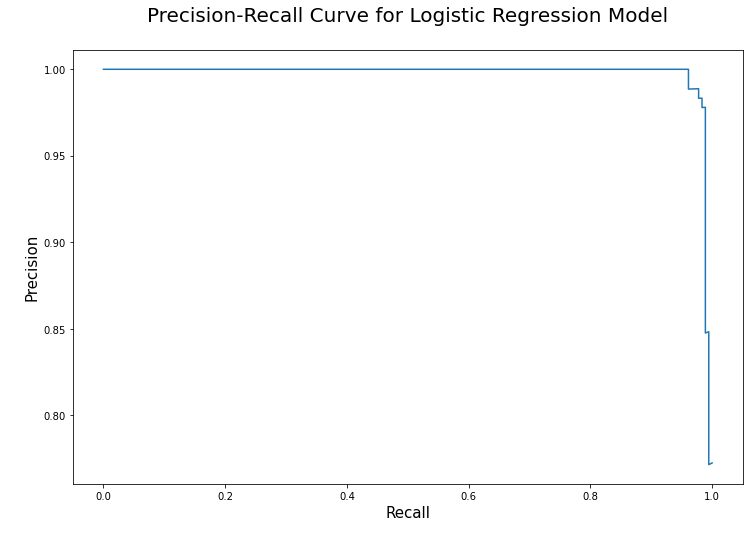

In [26]:
# Plotting the precision-recall curve for logistic regression model
precision, recall, thresholds = precision_recall_curve(y_test, final_log_reg_model.predict_proba(X_test)[:,1])
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(recall, precision)
ax.set_title('Precision-Recall Curve for Logistic Regression Model\n', fontsize=20)
ax.set_ylabel('\nPrecision', fontsize=15)
ax.set_xlabel('Recall\n', fontsize=15)
plt.show()

 - This curve shows that logistic regression model is almost ideal.
 - Because the curve is so so close to the right-top of the graph.
 - So that performance of this model is really good

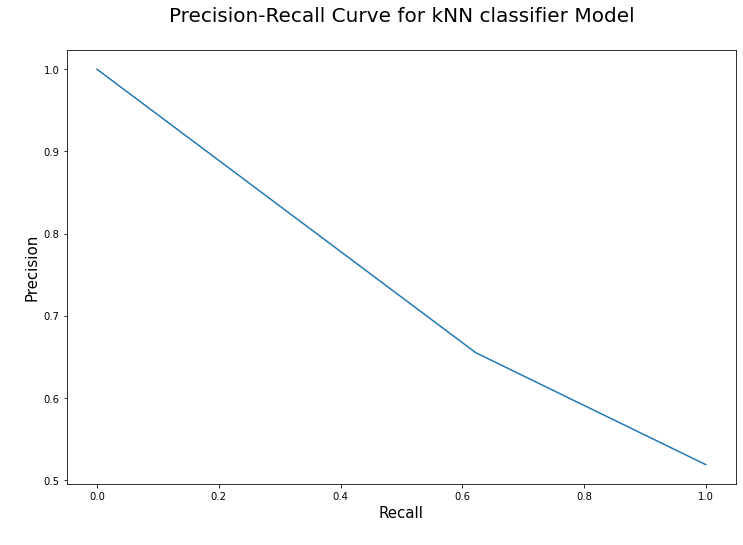

In [27]:
# Plotting the precision-recall curve for kNN classifier model
precision, recall, thresholds = precision_recall_curve(y_test, final_knn_cls.predict_proba(X_test)[:,1])
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(recall, precision)
ax.set_title('Precision-Recall Curve for kNN classifier Model\n', fontsize=20)
ax.set_ylabel('\nPrecision', fontsize=15)
ax.set_xlabel('Recall\n', fontsize=15)
plt.show()

 - Unlike the logistic regression, this curve(almost linear) shows that kNN model is really far from the ideal.
 - Because the curve is far far away from the right-top of the graph.
 - So that performance of this model is decent-bad.